<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Day_2/03_MLP_SGD/03_MLP_SGD_pckg.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
###############################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV) #
# Author 2: Fernando Arce-Vega (CIO)          #
# e-mail 1: wilfrido.gomez@cinvestav.mx       #
# e-mail 2: farce@cio.mx                      #
# Date:     nov/03/2025                       #
# Subject:  Multi-layer perceptron - SGD      #
###############################################

In [ ]:
# Libraries
import numpy as np                                                    # Numerical array operations
import matplotlib.pyplot as plt                                       # Data plotting/visualization
import os                                                             # Interaction with the operating system
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Model evaluation
import tensorflow as tf                                               # Machine learning

In [ ]:
# Download MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Check feature and targets shapes for training and testing
print(f'Training features shape: {x_train.shape}')
print(f'Training targets shape:  {y_train.shape}\n')
print(f'Testing features shape:  {x_test.shape}')
print(f'Testing targets shape:   {y_test.shape}')

Training features shape: (60000, 28, 28)
Training targets shape:  (60000,)

Testing features shape:  (10000, 28, 28)
Testing targets shape:   (10000,)


SGD-based training algorithm:

$$
\begin{align*}
& \textbf{input:} \quad X = \{(\mathbf{x}_i, \mathbf{t}_i)|i = 1, \dots, n\}, \eta, n_b, r_{\max} \\
\\
1: \quad & w_{ji} \leftarrow \text{rand}, w_{kj} \leftarrow \text{rand} && \triangleright \text{Weight initialization} \\
2: \quad & X_B \leftarrow \text{Batchify}(X, n_b) && \triangleright \text{Split dataset into mini-batches} \\
3: \quad & \textbf{for } r = 1, 2, \dots, r_{\max} \textbf{ do} && \triangleright \text{For each epoch} \\
4: \quad & \qquad X_B \leftarrow \text{Shuffle}(X_B) && \triangleright \text{Random permutation of mini-batch data} \\
5: \quad & \qquad \textbf{for each } X_b \in X_B \textbf{ do} && \triangleright \text{For each mini-batch} \\
6: \quad & \qquad \qquad \Delta w_{ji} \leftarrow 0, \Delta w_{kj} \leftarrow 0 \\
7: \quad & \qquad \qquad \textbf{for each } \mathbf{x}_l \in X_b \textbf{ do} && \triangleright \text{For each sample in the mini-batch} \\
8: \quad & \qquad \qquad \qquad z_k \leftarrow \text{MLP}(\mathbf{x}_l, w_{ji}, w_{kj}) && \triangleright \text{Feedforward} \\
9: \quad & \qquad \qquad \qquad \Delta w_{kj} \leftarrow \Delta w_{kj} + \delta_k y_j && \triangleright \text{Delta rules} \\
10: \quad & \qquad \qquad \qquad \Delta w_{ji} \leftarrow \Delta w_{ji} + \delta_j x_{li} \\
11: \quad & \qquad w_{kj} \leftarrow (1 - \eta)w_{kj} - \eta\Delta w_{kj} && \triangleright \text{Weight updates} \\
12: \quad & \qquad w_{ji} \leftarrow (1 - \eta)w_{ji} - \eta\Delta w_{ji} \\
\\
& \textbf{return:} \quad w_{ji}, w_{kj}
\end{align*}
$$

Training images



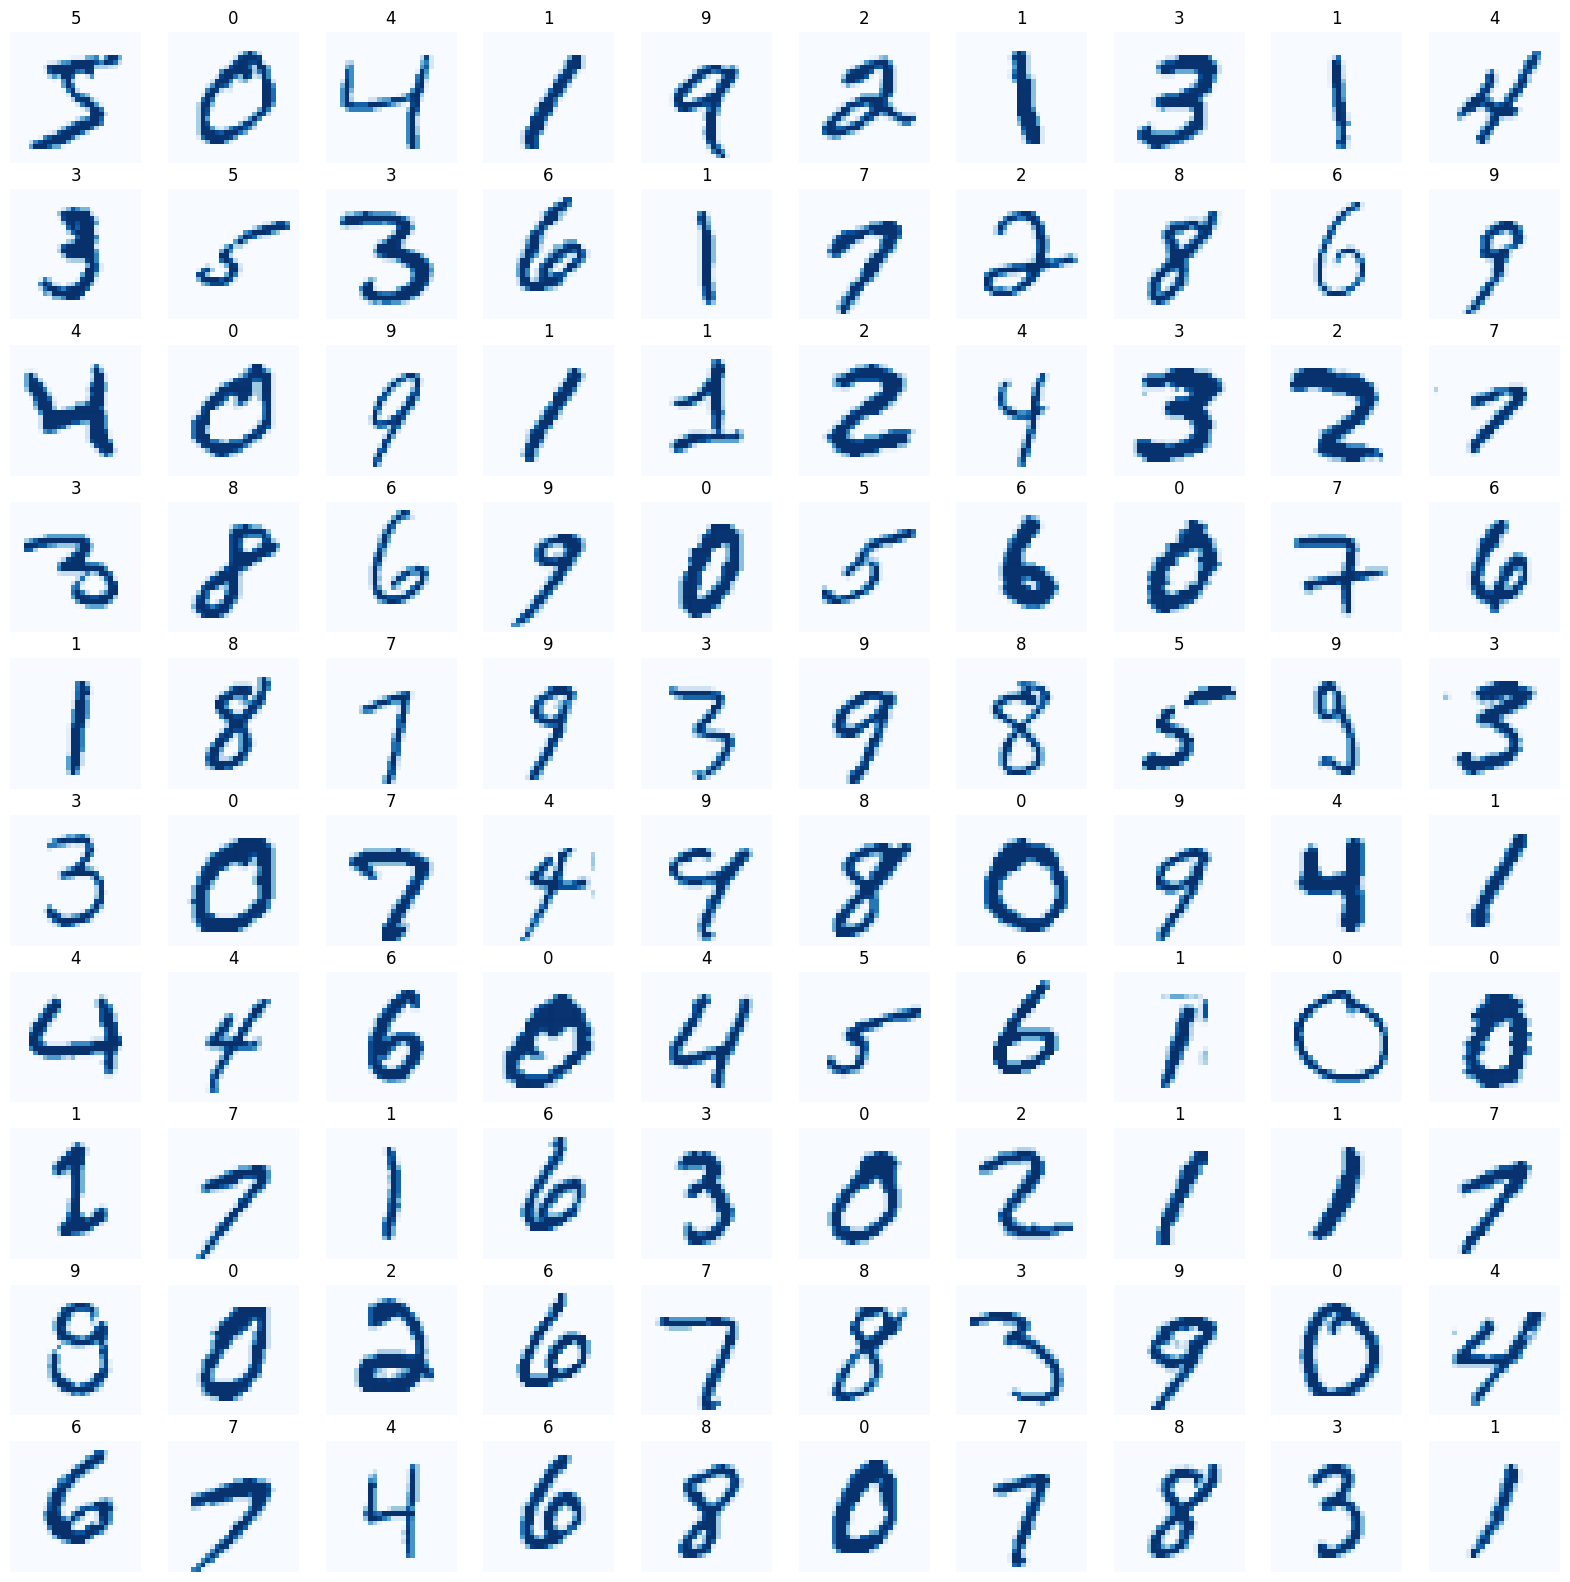

In [ ]:
# Data visualization
ncols = 10
nrows = 10

# Create figure
fig, axs = plt.subplots(figsize = (20, 20))
plt.axis('off')

print('Training images\n')

for i in range(ncols * nrows):

  axs = fig.add_subplot(nrows, ncols, i + 1)
  axs.imshow(x_train[i], cmap = 'Blues')
  axs.axis('off')

  label = str(y_train[i])
  plt.title(label)

plt.show()

In [ ]:
# Data preprocessing
# Converting images to vectors
x_train = x_train.reshape(np.shape(x_train)[0], -1)
x_test = x_test.reshape(np.shape(x_test)[0], -1)

# Changing the precision type of data
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# Normalize data
x_train /= 255.0 # x_train = x_train / 255.0
x_test /= 255.0  #  x_test = x_test / 255.0

In [ ]:
# Check feature and targets shapes for training and testing
print(f'Training features shape: {x_train.shape}')
print(f'Training targets shape:  {y_train.shape}\n')
print(f'Testing features shape:  {x_test.shape}')
print(f'Testing targets shape:   {y_test.shape}')

Training features shape: (60000, 784)
Training targets shape:  (60000,)

Testing features shape:  (10000, 784)
Testing targets shape:   (10000,)


In [ ]:
def mlp(X, y, h, eta, lam, nb, epochMax):
    # Model
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(
        units=h,
        activation='relu',
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        kernel_regularizer=tf.keras.regularizers.l2(lam)),   # L2 regularization

    tf.keras.layers.Dense(
        units=10,
        activation='softmax',
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        kernel_regularizer=tf.keras.regularizers.l2(lam))])   # L2 regularization

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=eta)

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    # Training model
    history = model.fit(X, y,
                    batch_size = nb,
                    epochs = epochMax,
                    verbose = 2)
    return model, history

In [ ]:
# Train MLP with mini-batch SGD
# Hyper-parameters
h = 15               # Hidden neurons
nb = 128             # Mini-batch size
epochMax = 20        # Number of training epochs
eta = 1e-3           # Learning rate
lam = 1e-4           # Regularization factor

model, history = mlp(x_train, y_train, h, eta, lam, nb, epochMax)

Epoch 1/20
469/469 - 2s - 4ms/step - accuracy: 0.8144 - loss: 0.6574
Epoch 2/20
469/469 - 1s - 3ms/step - accuracy: 0.9135 - loss: 0.3151
Epoch 3/20
469/469 - 1s - 2ms/step - accuracy: 0.9245 - loss: 0.2789
Epoch 4/20
469/469 - 1s - 2ms/step - accuracy: 0.9291 - loss: 0.2612
Epoch 5/20
469/469 - 1s - 2ms/step - accuracy: 0.9338 - loss: 0.2491
Epoch 6/20
469/469 - 1s - 2ms/step - accuracy: 0.9363 - loss: 0.2402
Epoch 7/20
469/469 - 1s - 3ms/step - accuracy: 0.9395 - loss: 0.2316
Epoch 8/20
469/469 - 1s - 2ms/step - accuracy: 0.9410 - loss: 0.2249
Epoch 9/20
469/469 - 1s - 2ms/step - accuracy: 0.9434 - loss: 0.2192
Epoch 10/20
469/469 - 2s - 3ms/step - accuracy: 0.9446 - loss: 0.2139
Epoch 11/20
469/469 - 1s - 3ms/step - accuracy: 0.9460 - loss: 0.2090
Epoch 12/20
469/469 - 1s - 2ms/step - accuracy: 0.9478 - loss: 0.2052
Epoch 13/20
469/469 - 1s - 2ms/step - accuracy: 0.9482 - loss: 0.2012
Epoch 14/20
469/469 - 1s - 2ms/step - accuracy: 0.9493 - loss: 0.1976
Epoch 15/20
469/469 - 1s - 2m

In [ ]:
# Predict test data
Ypp = model.predict(x_test)
Ypp = np.argmax(Ypp, axis = 1)
print(Ypp.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000,)


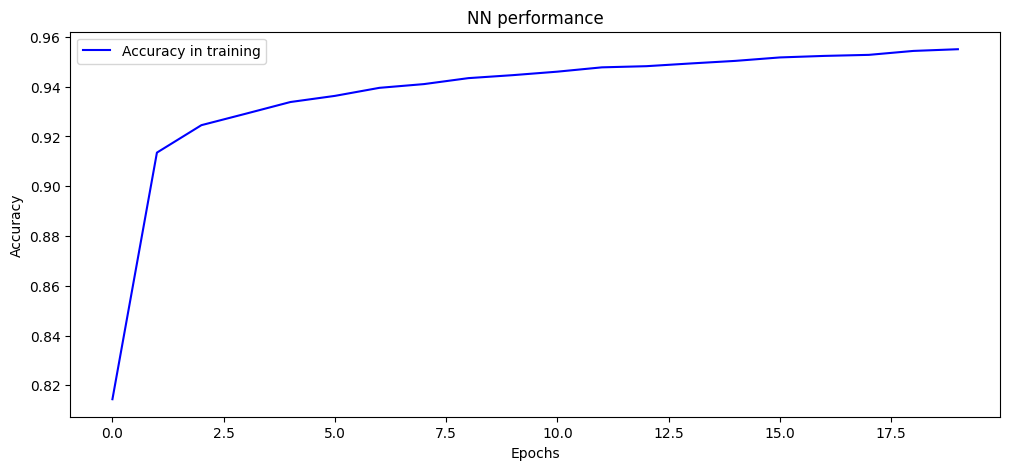

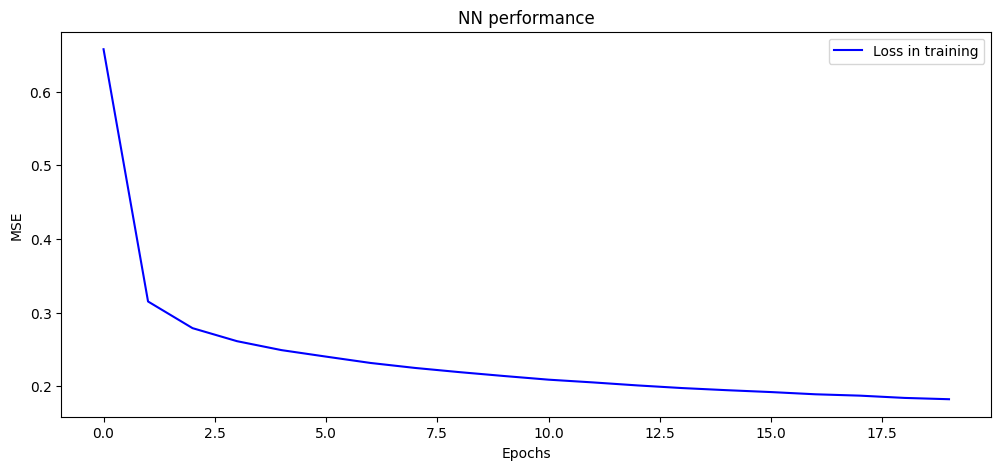

In [ ]:
# Learning curve
training_acc = history.history['accuracy']
training_loss = history.history['loss']

epocs = np.arange(len(training_loss))

plt.figure(figsize = (12, 5))
plt.plot(epocs, training_acc, color = 'blue', label = 'Accuracy in training')
plt.title('NN performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()

plt.figure(figsize = (12, 5))
plt.plot(epocs, training_loss, color = 'blue', label = 'Loss in training')
plt.title('NN performance')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

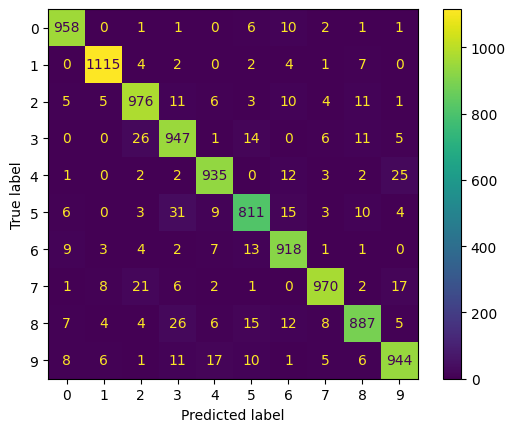

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, Ypp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Print classification error
err = np.mean(Ypp != y_test)
print(f'Error: {100 * err:.3f}%')

Error: 5.390%


Test images



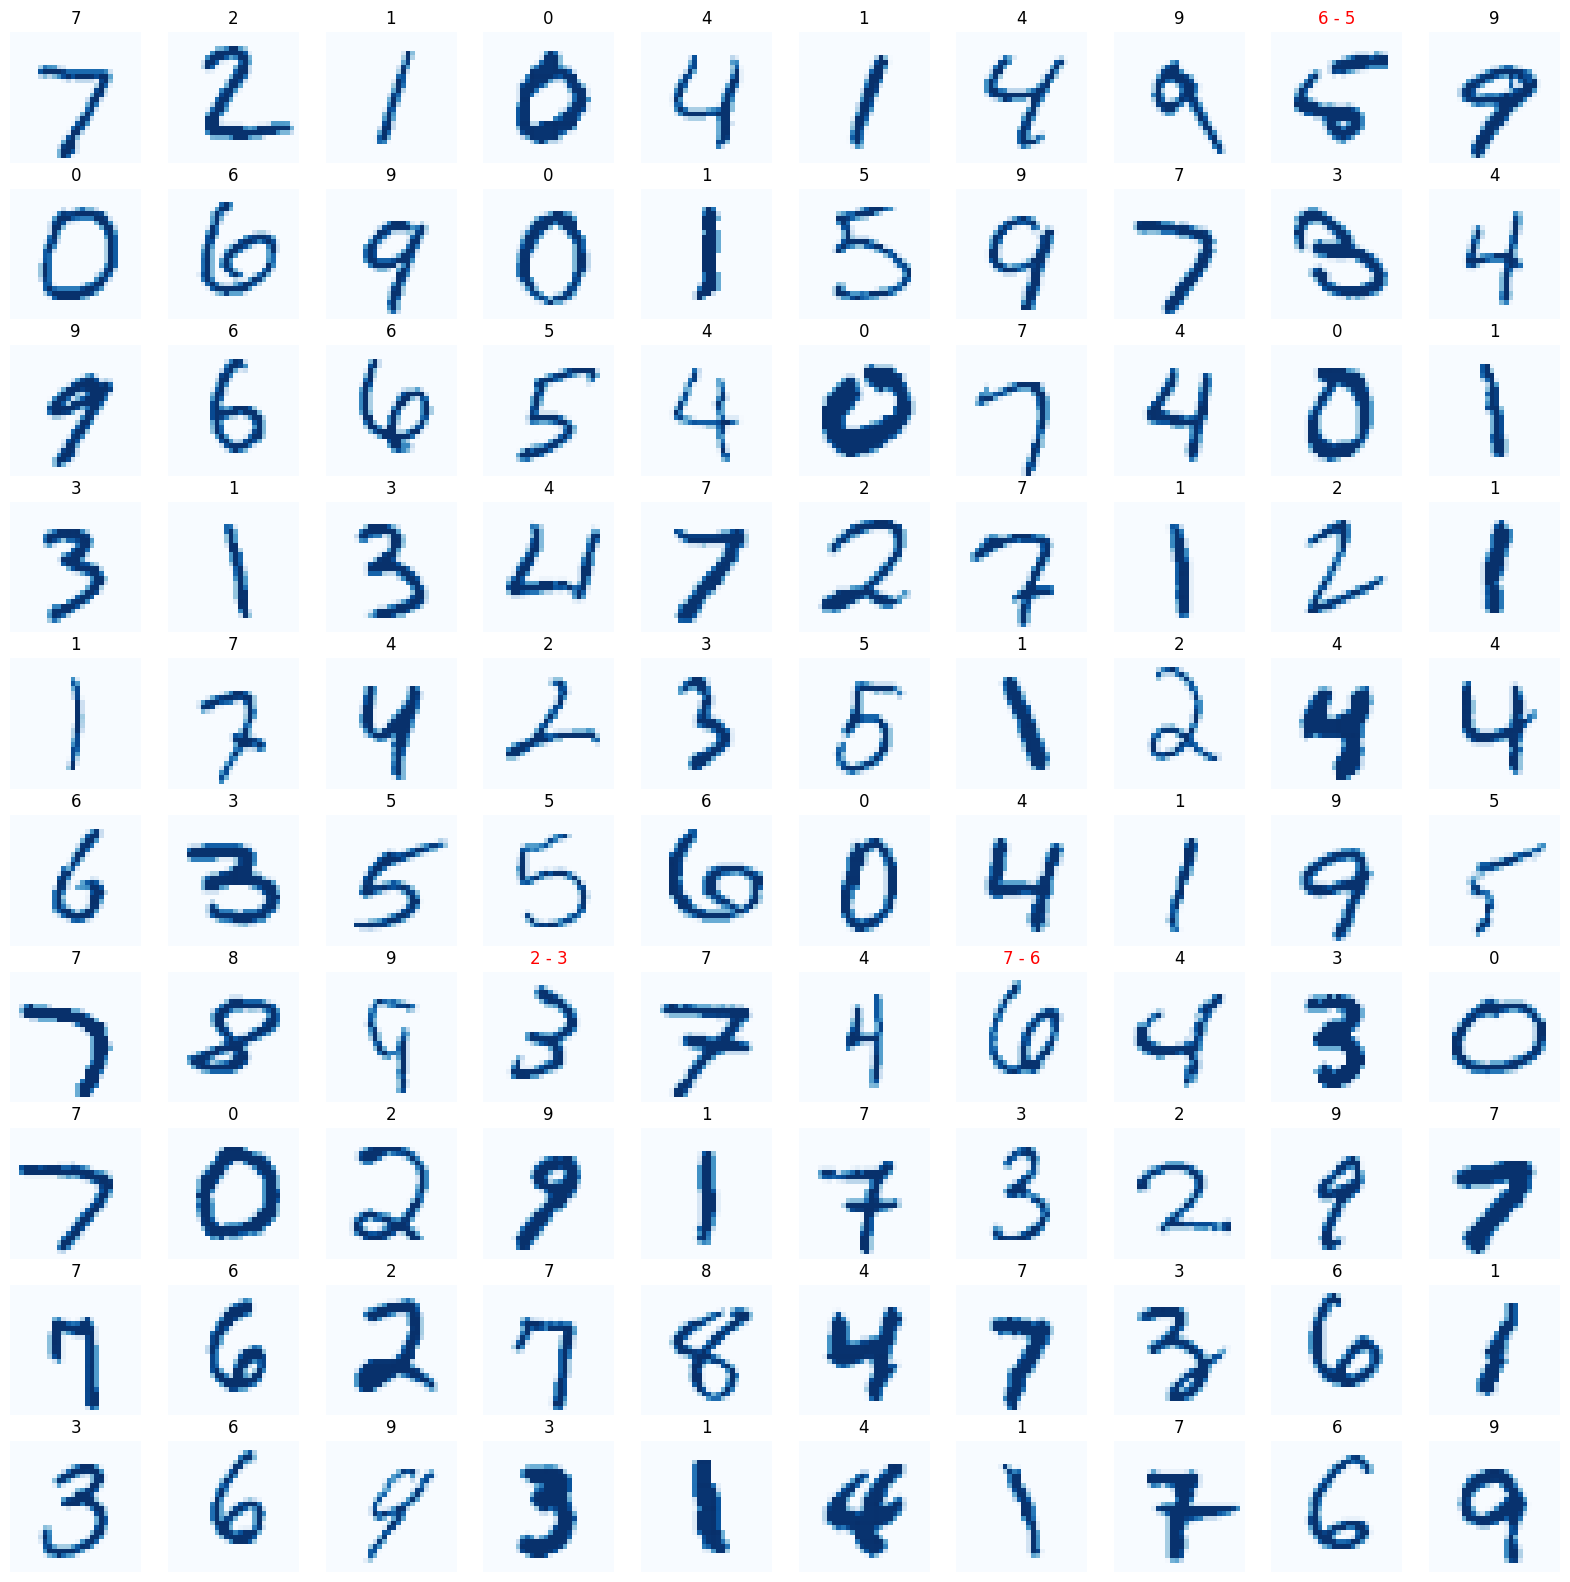

In [ ]:
# Prediction: Data visualization
ncols = 10
nrows = 10

# Create figure
fig, axs = plt.subplots(figsize = (20, 20))
plt.axis('off')

print('Test images\n')
Xtt_plot = x_test.reshape(np.shape(x_test)[0], 28, 28)

for i in range(ncols * nrows):

  axs = fig.add_subplot(nrows, ncols, i + 1)
  axs.imshow(Xtt_plot[i], cmap = 'Blues')
  axs.axis('off')

  # Check prediction
  if Ypp[i] != y_test[i]:
    label = str(Ypp[i]) + ' - ' + str(y_test[i])
    plt.title(label, color='red')

  else:
    label = str(Ypp[i])
    plt.title(label)


  plt.title(label)

plt.show()